In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Dataprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df.Gender=le.fit_transform(df['Gender'])

In [9]:
x=df.drop('Weight', axis=1)

In [10]:
y=df['Weight']

In [11]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

# split data

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.30, random_state=1)

In [13]:
xtrain.shape

(5988, 2)

In [14]:
xtest.shape

(2567, 2)

# linearregression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
le=LinearRegression()

In [17]:
le.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ytest

7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
           ...    
8004    110.815421
7644    148.605255
8521    153.436481
957     170.310122
233     195.392618
Name: Weight, Length: 2567, dtype: float64

In [19]:
pred=le.predict(xtest)

In [20]:
pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [21]:
le.score(xtest,ytest)

0.905995960709116

In [22]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,le.predict(xtest))
mae

7.98213259272913

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(ytest,le.predict(xtest))
mse

99.67250998070034

In [24]:
score=r2_score(ytest,pred)
score

0.905995960709116

# Apply KNN Regressor

In [25]:
knn=KNeighborsRegressor(n_neighbors = 100)

In [26]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [27]:
pred1=knn.predict(xtest)
pred1

array([142.83375838, 198.29567688, 185.1495741 , ..., 159.8721488 ,
       185.95631787, 201.0705108 ])

In [28]:
mean_squared_error(ytest,pred1)

104.01856360504236

In [29]:
mean_absolute_error(ytest,pred1)

8.121067658962096

In [30]:
r2_score(ytest,pred1)

0.9018970712987657

# KNN Classifier:

In [33]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [35]:
x=df.drop('Gender',axis=1)

In [36]:
y=df['Gender']

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.30, random_state=1)

In [39]:
clf=KNeighborsClassifier(n_neighbors=100,weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,)

In [40]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=100)

In [42]:
pred2=clf.predict(xtest)
pred2

array([1, 1, 1, ..., 0, 1, 1])

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(ytest, clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1055
           1       0.93      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [45]:
cm=confusion_matrix(ytest,pred2)
cm

array([[ 950,  105],
       [ 104, 1408]], dtype=int64)

In [46]:
# tp=950, fp=105, tn=1408 fn=104

In [47]:
#Accuracy
(950+1408)/(950+105+1408+104)

0.9185820023373588

In [49]:
accuracy_score(ytest, clf.predict(xtest))

0.9185820023373588

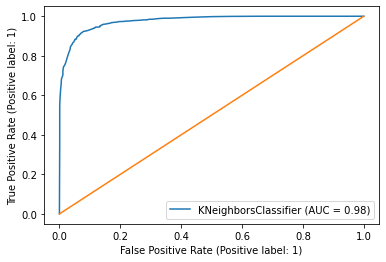

In [60]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])